In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the datasets into DataFrames
df = pd.read_csv('dealing-with-anxiety-depression-approaches.csv')
source1_df = pd.read_csv('anxiety-disorders-prevalence-vs-gdp.csv')

# Merge the DataFrames based on both 'Country' and 'Year' columns
merged_df = pd.merge(df, source1_df, on=['Entity', 'Year'], how='inner')

# Drop rows where GDP column contains NaN values
merged_df_cleaned = merged_df.dropna(subset=['GDP per capita, PPP (constant 2017 international $)', ' Engaged in religious/spiritual activities when anxious/depressed'])  # Replace 'specific_column' with the actual column name

# Save the filtered data to modified_data.csv
merged_df_cleaned.to_csv('merged_cleaned_data.csv', index=False)

 Engaged in religious/spiritual activities when anxious/depressed
Improved healthy lifestyle behaviors when anxious/depressed
Made a change to work situation when anxious/depressed
Made a change to personal relationships when anxious/depressed
Talked to friends or family when anxious/depressed
Took prescribed medication when anxious/depressed
Spent time in nature/the outdoors when anxious/depressed 
Talked to mental health professional when anxious/depressed


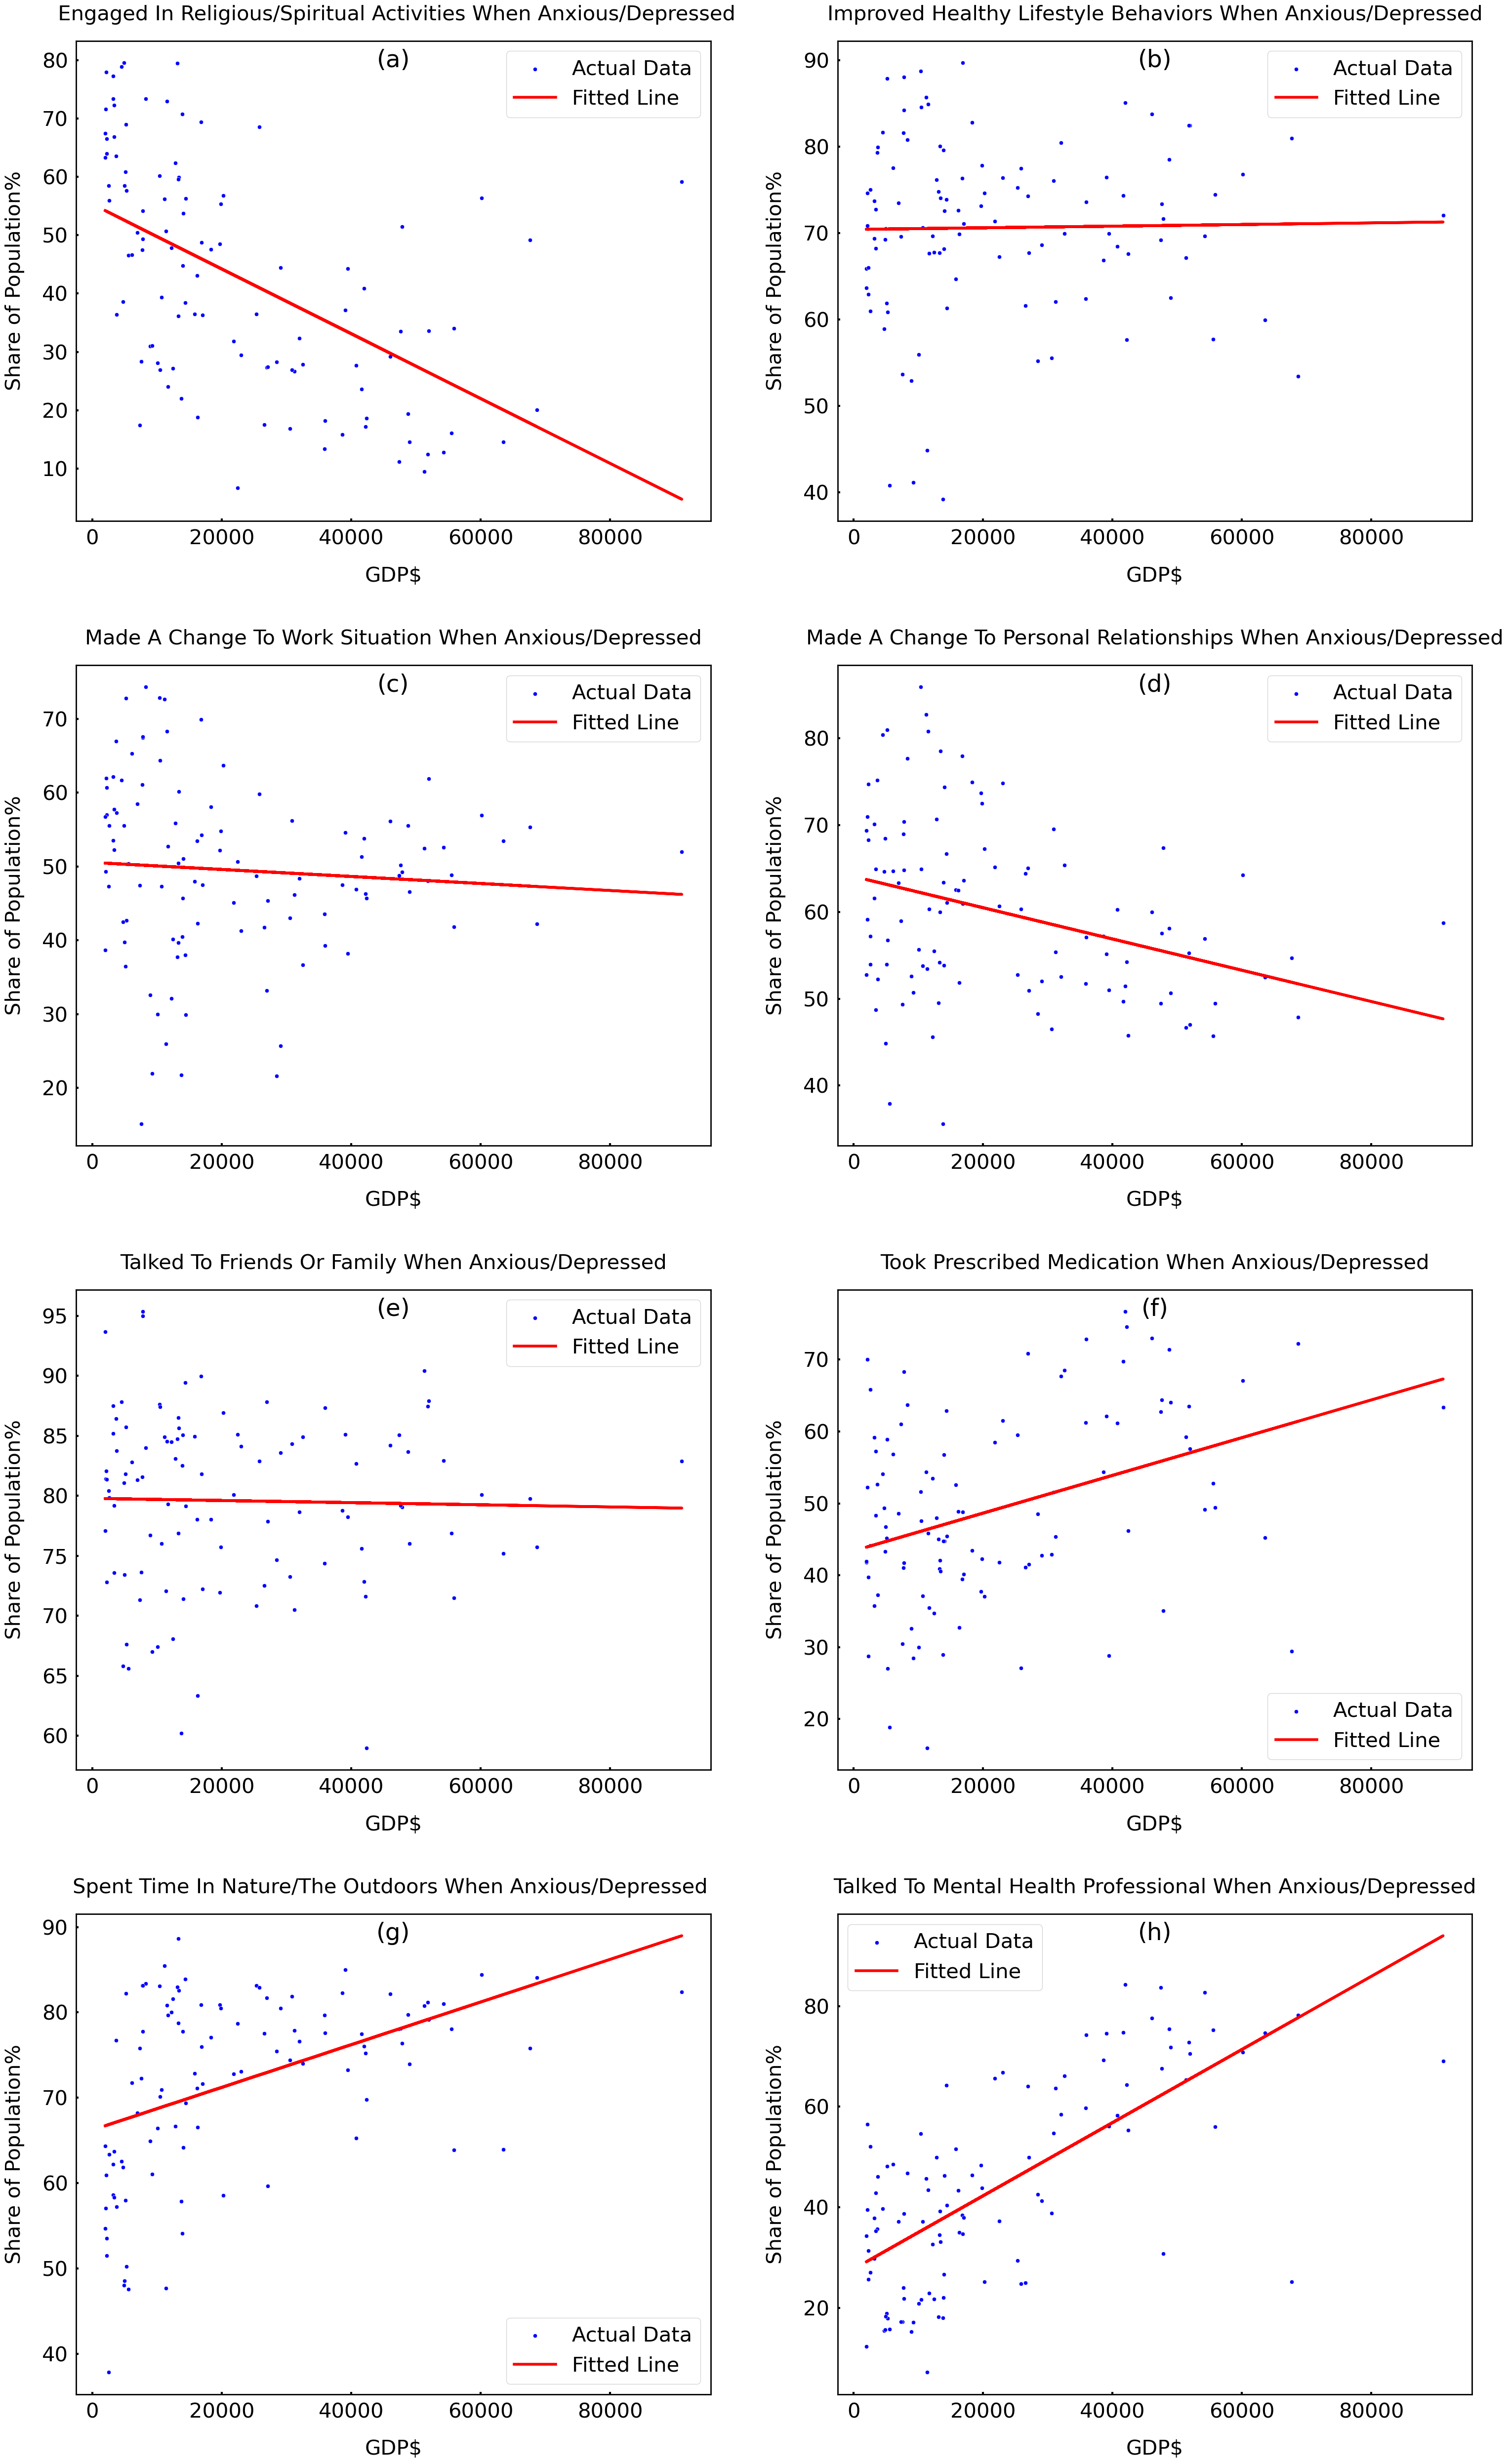

In [2]:
# Function to perform linear regression and plot results using statsmodels
def perform_linear_regression(df, x_col, y_col, i):
    # Prepare the data
    X = df[x_col]
    y = df[y_col]
    
    # Add a constant to the independent variable
    X = sm.add_constant(X)
    
    # Create the OLS model
    model = sm.OLS(y, X).fit()
    
    # Get the model's predictions
    predictions = model.predict(X)
    
    # Plot outputs
    sns.scatterplot(x=df[x_col], y=df[y_col], ax=axs[i], color='blue', label='Actual Data')
    axs[i].plot(df[x_col], predictions, color='red', linewidth=4, label='Fitted Line')
    axs[i].set_title(f'{y_col.replace("_", " ").title()}', fontsize=30, pad=30)
    axs[i].set_xlabel('GDP$', fontsize=30, labelpad=25)
    axs[i].set_ylabel('Share of Population%', fontsize=30, labelpad=25)
    axs[i].tick_params(axis='both', which='major', labelsize=30) 
    axs[i].legend(fontsize=30)
    # Add caption
    axs[i].text(0.5, 0.945, captions[i], transform=axs[i].transAxes, fontsize=35, ha='center')
    # Increase the thickness of the tick lines
    axs[i].tick_params(axis='both', which='major', direction='in', width=3)  
    # Increase the distance between tick labels and axis
    axs[i].tick_params(axis='both', which='major', pad=12)
    # Increase the thickness of the axis tick lines
    axs[i].spines['top'].set_linewidth(2)  
    axs[i].spines['right'].set_linewidth(2)  
    axs[i].spines['bottom'].set_linewidth(2)  
    axs[i].spines['left'].set_linewidth(2) 


# Columns to plot
columns_to_plot = [' Engaged in religious/spiritual activities when anxious/depressed', 
                  'Improved healthy lifestyle behaviors when anxious/depressed',
                  'Made a change to work situation when anxious/depressed',
                  'Made a change to personal relationships when anxious/depressed',
                  'Talked to friends or family when anxious/depressed',
                  'Took prescribed medication when anxious/depressed',
                  'Spent time in nature/the outdoors when anxious/depressed ',
                  'Talked to mental health professional when anxious/depressed']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(30, 50))
axs = axs.flatten()
captions = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)','(g)', '(h)']

# Plot
for i, col in enumerate(columns_to_plot):
     print (col)
     perform_linear_regression(merged_df_cleaned, 'GDP per capita, PPP (constant 2017 international $)', col, i)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)
# Save the plot 
plt.savefig('Approaches_over_mentalhealth')
# Show the plot
plt.show()